In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,5.8)
import sys
sys.path.insert(0, 'C:/Users/lukas/OneDrive - Johannes Kepler Universität Linz/Projekte/DLinear/data')
import datafactory
reload(datafactory)
from datafactory import DataSet
plt.rcParams["figure.figsize"] = (20,8)
dataset = DataSet(start_date="2022-01-01", target="i_m1sum", scale_target=False, scale_variables=False, time_features=False, resample=None,dynamic_price=False, demand_price=0.5, feedin_price=0.5).pipeline()
dataset = dataset[["date", "i_m1sum" ,"power_consumption", "thermal_consumption_kwh", "demand_price", "feedin_price", "kwh_eq_state"]]


                     date  i_m1sum  demand_price  feedin_price  \
0     2022-01-01 00:15:00    0.000             0           100   
1     2022-01-01 00:30:00    0.000             0           100   
2     2022-01-01 00:45:00    0.000             0           100   
3     2022-01-01 01:00:00    0.000             0           100   
4     2022-01-01 01:15:00    0.000             0           100   
...                   ...      ...           ...           ...   
42317 2023-03-24 12:15:00    0.219             0           100   
42318 2023-03-24 12:30:00    0.169             0           100   
42319 2023-03-24 12:45:00    0.122             0           100   
42320 2023-03-24 13:00:00    0.083             0           100   
42321 2023-03-24 13:15:01    0.090             0           100   

       power_consumption_kwh  thermal_consumption_kwh  kwh_eq_state  
0                      0.000                 0.042759      9.922370  
1                      0.000                 0.155037      9.767333

c:\Users\lukas\OneDrive - Johannes Kepler Universität Linz\Projekte\DLinear\RL_policy\extensiveSearch.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(res)


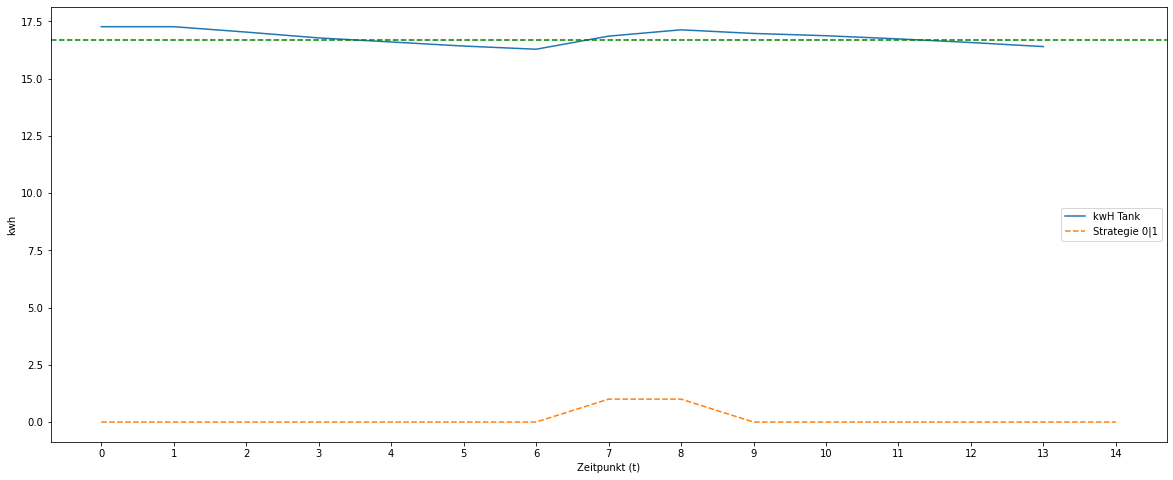

In [4]:
from extensiveSearch import Tree, Experiment, Experiment_Concat

levels = 14
start_date = "2022-07-24 12:00:00"

args = {
    "max_storage_tank": dataset.kwh_eq_state.max(),
    "optimum_storage":dataset.kwh_eq_state.max() * 0.9,
    "gamma1": 0,    # financial
    "gamma2": 1,      # distance optimum
    "gamma3": 0.0,      # tank change
    "demand_price": 0,
    "feedin_price": 100
}

dataset = DataSet(start_date="2022-01-01", target="i_m1sum", scale_target=False, scale_variables=False, time_features=False, dynamic_price=False, demand_price=args["demand_price"], feedin_price=args["feedin_price"]).pipeline()
dataset = dataset[["date","i_m1sum" , "demand_price", "feedin_price", "power_consumption_kwh", "thermal_consumption_kwh",  "kwh_eq_state"]]
print(dataset)

e = Experiment(levels, n_samples=2, dataset=dataset, args=args, exploit=True, random=False, start_date=start_date) 

start_dateIdx = dataset[dataset.date == start_date].index[0]
dataSeq = dataset.iloc[start_dateIdx:start_dateIdx+levels]


res = e.results()
plt.plot(res[0][0], label="kwH Tank")
plt.axhline(y=args["optimum_storage"], color='g', linestyle='--')
plt.plot(res[0][1], label="Strategie 0|1", linestyle='--')
plt.xticks(np.arange(len(res[0][1])))
plt.xlabel("Zeitpunkt (t)")
plt.ylabel("kwh")
plt.legend()
print(res[0])
print(res[1])



{'max_storage_tank': 18.52692592592593, 'optimum_storage': 16.674233333333337, 'gamma1': 0, 'gamma2': 1, 'gamma3': 0.0, 'demand_price': 0, 'feedin_price': 100}
0 0
1 1
2 3
3 7
4 15
5 31
6 63
7 127
8 255
9 511
10 1023
11 2047
12 4095
13 8191
0 0
1 1
2 3
3 7
4 15
5 31
6 63
7 127
8 255
9 511
10 1023
11 2047
12 4095
13 8191
17.26725
17.150972222222226
{'max_storage_tank': 18.52692592592593, 'optimum_storage': 16.674233333333337, 'gamma1': 0, 'gamma2': 1, 'gamma3': 0.0, 'demand_price': 0, 'feedin_price': 100}
0 0
1 1
2 3
3 7
4 15
5 31
6 63
7 127
8 255
9 511
10 1023


c:\Users\lukas\OneDrive - Johannes Kepler Universität Linz\Projekte\DLinear\RL_policy\extensiveSearch.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(res)


11 2047
12 4095
13 8191
0 0
1 1
2 3
3 7
4 15
5 31
6 63
7 127
8 255
9 511
10 1023
11 2047
12 4095
13 8191
17.26725
17.150972222222226
{'max_storage_tank': 18.52692592592593, 'optimum_storage': 16.674233333333337, 'gamma1': 0, 'gamma2': 1, 'gamma3': 0.0, 'demand_price': 0, 'feedin_price': 100}


c:\Users\lukas\OneDrive - Johannes Kepler Universität Linz\Projekte\DLinear\RL_policy\extensiveSearch.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(res)


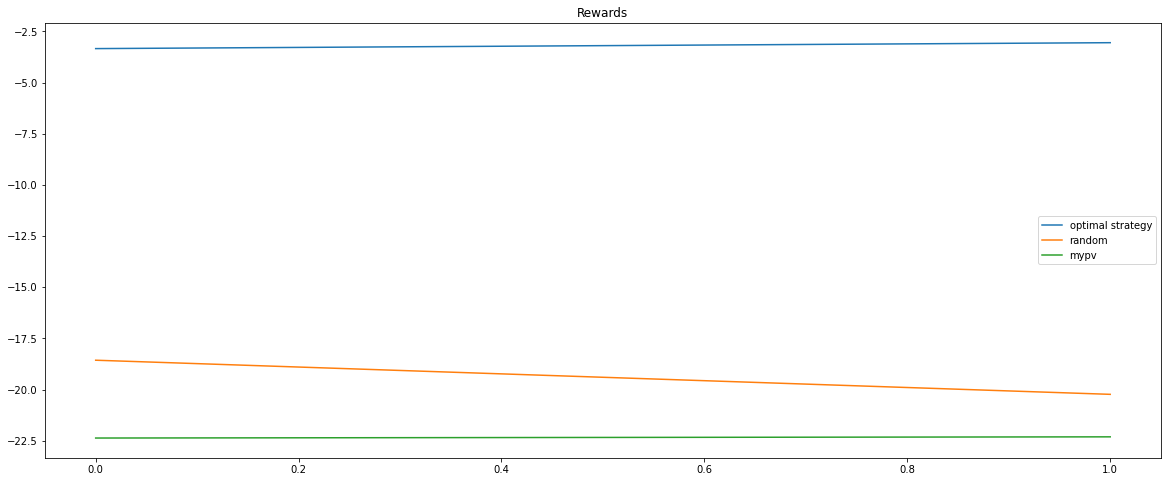

In [5]:
_n = 2


rewards = Experiment(levels, n_samples=_n, dataset=dataset, args=args, exploit=True, random=False, start_date=start_date).results()[:,2]
rewards_r = Experiment(levels, n_samples=_n, dataset=dataset, args=args, exploit=True, random=True, start_date=start_date).results()[:,2]
rewards_mypv = Experiment(levels, n_samples=_n, dataset=dataset, args=args, exploit=True, random=True, start_date=start_date).pipe_mypv()

plt.plot(rewards, label="optimal strategy")
plt.plot(rewards_r, label="random")
plt.plot(rewards_mypv, label="mypv")
plt.title("Rewards")
plt.legend()
plt.show()

<h1>Simulation Concatenated Tree<h1>

{'max_storage_tank': 18.52692592592593, 'optimum_storage': 16.674233333333337, 'gamma1': 0, 'gamma2': 1, 'gamma3': 0.0, 'demand_price': 1, 'feedin_price': 2}
0 0
1 1
2 3
3 7
4 15
5 31
6 63
7 127
8 255
9 511
10 1023
11 2047
12 4095
13 8191


c:\Users\lukas\OneDrive - Johannes Kepler Universität Linz\Projekte\DLinear\RL_policy\extensiveSearch.py:268: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seq_split.kwh_eq_state.iloc[0] = last_state


0 0
1 1
2 3
3 7
4 15
5 31
6 63
7 127
8 255
9 511
10 1023
11 2047
12 4095
13 8191
0 0
1 1
2 3
3 7
4 15
5 31
6 63
7 127
8 255
9 511
10 1023
11 2047
12 4095
13 8191
0 0
1 1
2 3
3 7
4 15
5 31
6 63
7 127
8 255
9 511
10 1023
11 2047
12 4095
13 8191
0 0
1 1
2 3
3 7
4 15
5 31
6 63
7 127
8 255
9 511
10 1023
11 2047
12 4095
13 8191


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[array([14.30216667, 14.30216667, 14.20216667, 14.10216667, 14.00216667,
       14.22216667, 14.12216667, 13.83168519, 14.40068519, 14.15      ,
       13.89155556, 14.65790741, 15.25522222, 16.23288889]), array([15.91502778, 15.91502778, 17.54102778, 18.52692593, 18.42692593,
       18.52692593, 18.42692593, 18.52692593, 18.42692593, 18.52692593,
       18.52692593, 18.52692593, 18.52692593, 18.34940741]), array([18.52692593, 18.34940741, 18.52692593, 18.36878704, 18.13312963,
       17.93623148, 17.75871296, 17.58119444, 17.40367593, 17.34715741,
       17.15025926, 17.0115    , 16.85336111, 16.67584259]), array([16.5177037 , 16.34018519, 16.20142593, 15.86887037, 15.65259259,
       15.4944537 , 15.33631481, 15.17817593, 15.02003704, 14.86189815,
       14.72313889, 14.565     , 14.40686111, 14.26810185]), array([14.10996296, 13.95182407, 13.79368519, 13.67430556, 13.5355463 ,
       13.37740741, 13.21926852, 13.08050926, 12.92237037, 12.76423148,
       12.64485185, 12.48671296, 12

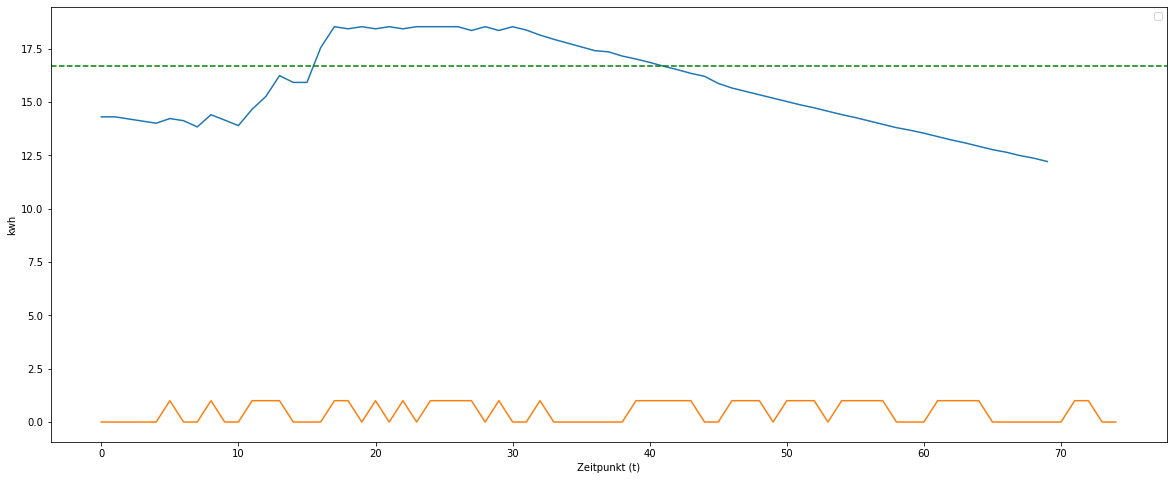

In [7]:
args = {
    "max_storage_tank": dataset.kwh_eq_state.max(),
    "optimum_storage":dataset.kwh_eq_state.max() * 0.9,
    "gamma1": 0,    # financial
    "gamma2": 1,      # distance optimum
    "gamma3": 0.0,      # tank change
    "demand_price": 1,
    "feedin_price": 2
}


dataset = DataSet(start_date="2022-01-01", target="i_m1sum", scale_target=False, scale_variables=False, time_features=False, dynamic_price=False, demand_price=args["demand_price"], feedin_price=args["feedin_price"]).pipeline()
dataset = dataset[["date", "i_m1sum" ,"power_consumption_kwh", "thermal_consumption_kwh", "demand_price", "feedin_price", "kwh_eq_state"]]

e = Experiment_Concat(levels, n_samples=1, dataset=dataset, args=args, exploit=True, random=True, start_date="2022-07-24 05:00:00", n_trees=5) 


res = e.results_concat()


plt.plot(np.array(res[0]).flatten())
plt.axhline(y=args["optimum_storage"], color='g', linestyle='--')
plt.plot(np.array(res[1]).flatten())

plt.xlabel("Zeitpunkt (t)")
plt.ylabel("kwh")
plt.legend()

print(res[0])
print(res[1])

[array([7.7314, 7.7314, 7.6314, 7.5314, 7.4314, 7.3314, 7.2314, 7.1314,
       7.0314, 6.9314, 6.8314, 6.7314, 6.6314, 6.5314, 6.4314, 6.3314,
       6.2314, 6.1314, 6.0314]), array([5.9314  , 5.9314  , 5.8314  , 5.731762, 5.63201 , 5.44501 ,
       5.34501 , 5.24501 , 5.14501 , 5.045048, 4.945098, 4.84513 ,
       4.745133, 4.645133, 4.545133, 4.445133, 4.345133, 4.245133,
       4.139333]), array([4.039333, 4.039333, 3.939333, 3.833533, 3.727733, 3.627733,
       3.521933, 3.416133, 3.310333, 3.210333, 3.098733, 2.992933,
       2.887133, 2.775533, 2.669733, 2.558133, 2.452333, 2.340733,
       2.234933]), array([2.129133, 2.129133, 2.017533, 1.911733, 1.805933, 1.694333,
       1.582733, 1.471133, 1.353733, 1.247933, 1.147933, 1.047933,
       0.947933, 0.847933, 0.747933, 0.647933, 0.547933, 0.447933,
       0.347933]), array([ 0.247933,  0.247933,  0.147933,  0.047933, -0.052067, -0.152067,
       -0.252067, -0.352067, -0.452067, -0.552067, -0.652067, -0.752067,
       -0.852067, 

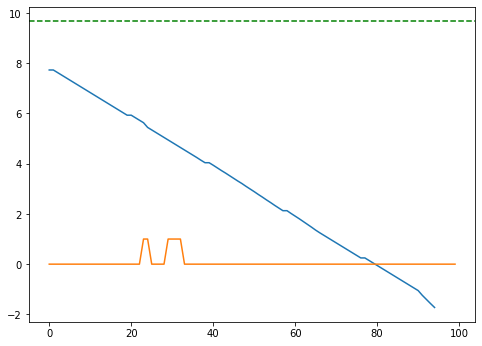

https://www.edureka.co/community/18855/numpy-multiplying-large-arrays-with-dtype-int8-is-slow

In [63]:
d = np.ones(2**20, dtype="u1")
print("Memory size of numpy array in MB:",d.size * d.itemsize/1000000)

d = np.ones(2**20, dtype="float32")
print("Memory size of numpy array in MB:",d.size * d.itemsize/1000000, "| Tracked time demo run: 40sec")

d = np.ones(2**20)
print("Memory size of numpy array in MB:",d.size * d.itemsize/1000000, "| Tracked time demo run: 13sec")

Memory size of numpy array in MB: 1.048576
Memory size of numpy array in MB: 4.194304 | Tracked time demo run: 40sec
Memory size of numpy array in MB: 8.388608 | Tracked time demo run: 13sec
